In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('train.csv')

In [4]:
train['Sex'].replace({
    'male' : 1,
    'female': 0
}, inplace=True)

In [5]:
train['Age'].replace({
    np.nan : np.sum(train['Age']) / train.shape[0]
}, inplace=True)

In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train['Embarked'].replace({
    np.nan : 'C'
}, inplace=True)

In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [10]:
train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [11]:
train['Embarked'].replace({
    "C" : 1,
    'Q' : 2,
    'S' : 3
}, inplace=True)

In [12]:
train['Embarked'].unique()

array([3, 1, 2], dtype=int64)

In [13]:
X = np.array(train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']])

In [15]:
X.shape

(891, 6)

In [16]:
Y = np.array(train['Survived'])

In [17]:
Y.shape

(891,)

In [18]:
# Normalizing the training dataset
mu_X = np.mean(X, axis=0)
sigma_X = np.std(X, axis=0)
X = (X - mu_X) / sigma_X

In [19]:
X.max()

6.974147318082627

In [20]:
X[0]

array([ 0.82737724,  0.73769513, -0.49424498,  0.43279337, -0.47367361,
        0.58937471])

In [21]:
def sigmoid(z):
    g = 1.0 / (1 + np.exp(-z))
    return g

In [22]:
def compute_cost(x, y, w, b, lambda_=1):
    m, n = x.shape
    
    z = np.dot(x, w) + b
    f_wb = sigmoid(z)
    
    cost=-((1.0/m)*np.sum((y*np.log(f_wb)) + (1-y)*np.log(1-f_wb))) + (lambda_/(2*m))*np.sum(np.square(w))
    return cost

In [23]:
def compute_gradient(x, y, w, b, lambda_=1):
    m, n = x.shape
    
    dw = np.zeros((n, ))
    db = 0.0
    
    for i in range(m):
        z_i = np.dot(x[i], w) + b
        f_wb_i = sigmoid(z_i)
        err_i = f_wb_i - y[i]
        for j in range(n):
            dw[j] = dw[j] + (err_i * x[i, j])
        db = db + err_i
    dw = dw / m
    db = db / m
    
    for j in range(n):
        dw[j] = dw[j] + (lambda_/m) * w[j]
    return dw, db

In [24]:
def gradient_descent(x, y, max_iter, alpha):
    m, n = x.shape
    w = np.zeros((n ,))
    b = 0.0
    
    
    J_hist = []
    
    for i in range(max_iter):
        # Finding the value of the change i.e., dw and db
        dw, db = compute_gradient(x, y, w, b)
        
        # Updating the parameters w and b
        w = w - (alpha * dw)
        b = b - (alpha * db)
        
        # Finding the value of the cost function
        J_hist.append(compute_cost(x, y, w, b))
        
        # Printing the iteration and cost function value
        if i%50==0:
            print(f"Iteration: {i}; Cost: {J_hist[i]}")
    
    # Plotting the learning curve
    plt.plot(range(max_iter), J_hist)
    plt.title("Learning Curve")
    plt.xlabel("Iteration")
    plt.ylabel("Cost")
    plt.show()
    return w, b

Iteration: 0; Cost: 0.6919479008761301
Iteration: 50; Cost: 0.640238048366653
Iteration: 100; Cost: 0.6016007790730473
Iteration: 150; Cost: 0.5723650117437057
Iteration: 200; Cost: 0.5499156061958759
Iteration: 250; Cost: 0.5324164897422018
Iteration: 300; Cost: 0.5185779226883335
Iteration: 350; Cost: 0.5074862642126291
Iteration: 400; Cost: 0.4984862952094335
Iteration: 450; Cost: 0.49110155826272145
Iteration: 500; Cost: 0.48498062344875503
Iteration: 550; Cost: 0.4798606470745804
Iteration: 600; Cost: 0.47554241186123075
Iteration: 650; Cost: 0.471873023156028
Iteration: 700; Cost: 0.46873375633583164
Iteration: 750; Cost: 0.4660314094642298
Iteration: 800; Cost: 0.46369207077180613
Iteration: 850; Cost: 0.4616565708611956
Iteration: 900; Cost: 0.459877125030784
Iteration: 950; Cost: 0.45831482655333394
Iteration: 1000; Cost: 0.4569377555022372
Iteration: 1050; Cost: 0.45571953778800384
Iteration: 1100; Cost: 0.4546382369471281
Iteration: 1150; Cost: 0.45367549432241655
Iteration:

Iteration: 9750; Cost: 0.4441523815374783
Iteration: 9800; Cost: 0.4441523773405756
Iteration: 9850; Cost: 0.44415237340636327
Iteration: 9900; Cost: 0.44415236971837174
Iteration: 9950; Cost: 0.4441523662611663


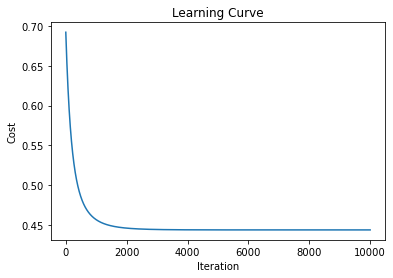

In [25]:
w1, b1 = gradient_descent(X, Y, 10000, 1e-2)

In [26]:
test = pd.read_csv('test.csv')

In [27]:
test['Sex'].replace({
    'male' : 1, 
    'female': 0
}, inplace=True)

In [28]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [29]:
test['Age'].unique()

array([34.5 , 47.  , 62.  , 27.  , 22.  , 14.  , 30.  , 26.  , 18.  ,
       21.  ,   nan, 46.  , 23.  , 63.  , 24.  , 35.  , 45.  , 55.  ,
        9.  , 48.  , 50.  , 22.5 , 41.  , 33.  , 18.5 , 25.  , 39.  ,
       60.  , 36.  , 20.  , 28.  , 10.  , 17.  , 32.  , 13.  , 31.  ,
       29.  , 28.5 , 32.5 ,  6.  , 67.  , 49.  ,  2.  , 76.  , 43.  ,
       16.  ,  1.  , 12.  , 42.  , 53.  , 26.5 , 40.  , 61.  , 60.5 ,
        7.  , 15.  , 54.  , 64.  , 37.  , 34.  , 11.5 ,  8.  ,  0.33,
       38.  , 57.  , 40.5 ,  0.92, 19.  , 36.5 ,  0.75,  0.83, 58.  ,
        0.17, 59.  , 14.5 , 44.  ,  5.  , 51.  ,  3.  , 38.5 ])

In [30]:
test['Age'].replace({
    np.nan : np.sum(test['Age']) / test.shape[0]
}, inplace=True)

In [31]:
test['Age'].unique()

array([34.5       , 47.        , 62.        , 27.        , 22.        ,
       14.        , 30.        , 26.        , 18.        , 21.        ,
       24.04425837, 46.        , 23.        , 63.        , 24.        ,
       35.        , 45.        , 55.        ,  9.        , 48.        ,
       50.        , 22.5       , 41.        , 33.        , 18.5       ,
       25.        , 39.        , 60.        , 36.        , 20.        ,
       28.        , 10.        , 17.        , 32.        , 13.        ,
       31.        , 29.        , 28.5       , 32.5       ,  6.        ,
       67.        , 49.        ,  2.        , 76.        , 43.        ,
       16.        ,  1.        , 12.        , 42.        , 53.        ,
       26.5       , 40.        , 61.        , 60.5       ,  7.        ,
       15.        , 54.        , 64.        , 37.        , 34.        ,
       11.5       ,  8.        ,  0.33      , 38.        , 57.        ,
       40.5       ,  0.92      , 19.        , 36.5       ,  0.75

In [32]:
test['Embarked'].replace({
    "C" : 1,
    'Q' : 2,
    'S' : 3
}, inplace=True)

In [33]:
test['Embarked'].unique()

array([2, 3, 1], dtype=int64)

In [34]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [35]:
X_test = np.array(test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']])

In [37]:
X_test.shape

(418, 6)

In [38]:
# Normalizing the test dataset
mu_test = np.mean(X_test, axis=0)
sigma_test = np.std(X_test, axis=0)
X_test = (X_test - mu_test) / sigma_test

In [39]:
X_test

array([[ 0.87348191,  0.75592895,  0.42809939, -0.49947002, -0.4002477 ,
        -0.47091535],
       [ 0.87348191, -1.32287566,  1.39949183,  0.61699237, -0.4002477 ,
         0.70076689],
       [-0.31581919,  0.75592895,  2.56516276, -0.49947002, -0.4002477 ,
        -0.47091535],
       ...,
       [ 0.87348191,  0.75592895,  0.73894497, -0.49947002, -0.4002477 ,
         0.70076689],
       [ 0.87348191,  0.75592895, -0.38443088, -0.49947002, -0.4002477 ,
         0.70076689],
       [ 0.87348191,  0.75592895, -0.38443088,  0.61699237,  0.61989583,
        -1.64259759]])

In [40]:
# Finding the optinmum boundary value condition
output_train_1 = []
for i in range(X.shape[0]):
    value_train_1 = sigmoid(np.dot(X[i], w1) + b1)
    if value_train_1 >= 0.5:
        output_train_1.append(1)
    else:
        output_train_1.append(0)

In [41]:
count_train_1 = 0
for i in range(Y.shape[0]):
    if output_train_1[i] != Y[i]:
        count_train_1 += 1

In [42]:
count_train_1

183

In [43]:
output_train_2 = []
for i in range(X.shape[0]):
    value_train_2 = sigmoid(np.dot(X[i], w1) + b1)
    if value_train_2 >= 0.65:
        output_train_2.append(1)
    else:
        output_train_2.append(0)

In [44]:
output_train_2==output_train_1

False

In [45]:
count_train_2 = 0
for i in range(Y.shape[0]):
    if output_train_2[i] != Y[i]:
        count_train_2 += 1

In [46]:
count_train_2

167

In [47]:
output_train_3 = []
for i in range(X.shape[0]):
    value_train_3 = sigmoid(np.dot(X[i], w1) + b1)
    if value_train_3 >= 0.70:
        output_train_3.append(1)
    else:
        output_train_3.append(0)

In [48]:
output_train_3 == output_train_2

False

In [49]:
count_train_3 = 0
for i in range(Y.shape[0]):
    if output_train_3[i] != Y[i]:
        count_train_3 += 1

In [50]:
count_train_3

186

In [51]:
output_train_4 = []
for i in range(X.shape[0]):
    value_train_4 = sigmoid(np.dot(X[i], w1) + b1)
    if value_train_4 >= 0.60:
        output_train_4.append(1)
    else:
        output_train_4.append(0)

In [52]:
output_train_4 == output_train_2

False

In [53]:
count_train_4 = 0
for i in range(Y.shape[0]):
    if output_train_4[i] != Y[i]:
        count_train_4 += 1

In [54]:
count_train_4

167

In [55]:
output_test_1 = []
for i in range(X_test.shape[0]):
    value_test_1 = sigmoid(np.dot(X_test[i], w1) + b1)
    if value_test_1 >= 0.60:
        output_test_1.append(1)
    else:
        output_test_1.append(0)

In [57]:
output_test_1.count(1)

128

In [58]:
output_test_1.count(0)

290

In [59]:
output_test_1 = np.array(output_test_1)

In [60]:
output_test_1.shape

(418,)

In [61]:
test.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,2


In [62]:
PassengerId = np.array(test['PassengerId'])

In [63]:
dataframe1 = pd.DataFrame([PassengerId, output_test_1])

In [64]:
dataframe1 = dataframe1.T

In [65]:
dataframe1

,0,1
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [66]:
dataframe1.rename(columns = {0:'PassengerId', 1:'Survived'}, inplace = True)

In [67]:
dataframe1

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [68]:
dataframe1.to_csv('gender_submission.csv', index=False)

In [70]:
output_test_2 = []
for i in range(X_test.shape[0]):
    value_test_2 = sigmoid(np.dot(X_test[i], w1) + b1)
    if value_test_2 >= 0.65:
        output_test_2.append(1)
    else:
        output_test_2.append(0)

In [72]:
output_test_2.count(1)

109

In [73]:
output_test_2.count(0)

309

In [74]:
output_test_2 = np.array(output_test_2)

In [75]:
dataframe2 = pd.DataFrame([PassengerId, output_test_2])

In [76]:
dataframe2 = dataframe2.T

In [77]:
dataframe2

,0,1
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [78]:
dataframe2.rename(columns = {0:'PassengerId', 1:'Survived'}, inplace = True)

In [80]:
dataframe2.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [81]:
dataframe2.to_csv('gender_submission.csv', index=False)